# Autoencoders

In [0]:
# Required Modules

import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

%matplotlib inline

In [0]:
# Applying some transformations like normalization.

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

In [0]:
# Downloading the training and testing datasets

train = datasets.MNIST('./data', download=True, train=True, transform=transform)
test = datasets.MNIST('./data', download=True, train=False, transform=transform)

In [0]:
# Converting the downloaded datasets into iterators

trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

In [17]:
# Defining the autoencoder as a class

class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6, 16, kernel_size=3),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 6, kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6, 1, kernel_size=3),
            nn.ReLU(True)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        
        return x
    
model = autoencoder()
print(model)

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 1, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
)


In [0]:
# Defining optimizer and loss function

optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

In [19]:
epochs = 10
training_loss, testing_loss = [], []

for e in range(epochs):
    running_loss = 0
    for image, _ in trainloader:
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output, image)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    test_loss = 0
    accuracy = 0
    for image, _ in testloader:
        output = model.forward(image)
        test_loss += criterion(output, image)
    
    training_loss.append(running_loss/len(trainloader))
    testing_loss.append(test_loss/len(testloader))
    
    print("Epochs {}/{} Training loss: {:6f}.. Testing loss: {:6f}".format(e+1, epochs, training_loss[e], testing_loss[e]))

Epochs 1/10 Training loss: 0.925589.. Testing loss: 0.925774
Epochs 2/10 Training loss: 0.925365.. Testing loss: 0.925770
Epochs 3/10 Training loss: 0.925369.. Testing loss: 0.925770
Epochs 4/10 Training loss: 0.925370.. Testing loss: 0.925775
Epochs 5/10 Training loss: 0.925369.. Testing loss: 0.925777
Epochs 6/10 Training loss: 0.925370.. Testing loss: 0.925784
Epochs 7/10 Training loss: 0.925368.. Testing loss: 0.925794
Epochs 8/10 Training loss: 0.925367.. Testing loss: 0.925769
Epochs 9/10 Training loss: 0.925368.. Testing loss: 0.925766
Epochs 10/10 Training loss: 0.925367.. Testing loss: 0.925816


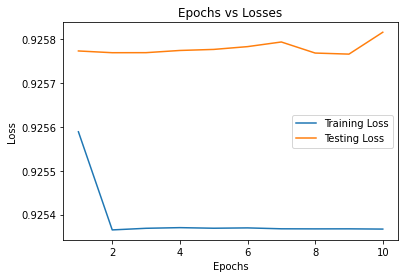

In [21]:
# Plotting Training vs Testing loss values

x_axis = range(1, epochs+1)

_, ax = plt.subplots()
ax.plot(x_axis, training_loss, label="Training Loss")
ax.plot(x_axis, testing_loss, label="Testing Loss")

ax.set_title("Epochs vs Losses")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend()